### CONSTANTS

In [2]:
PATHES = ['data/X_train.csv', 'data/X_test.csv', 'data/y_train.csv', 'data/y_test.csv']

### Importing Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE

import warnings
warnings.filterwarnings('ignore')

### Functions

In [3]:
def get_train_test_data(pathes):
    data = []
    for path in pathes:
        df = pd.read_csv(path)
        data.append(df)
    return data

### Reading Data

In [4]:
X_train, X_test, y_train, y_test = get_train_test_data(PATHES)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8000, 12)
X_test shape: (2000, 12)
y_train shape: (8000, 1)
y_test shape: (2000, 1)


### 01. Logistic Regression

In [19]:
estimator = LogisticRegression(solver='newton-cholesky', penalty='l2')
estimator.fit(X_train, y_train)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7705   24]
 [ 194   77]]
Test Confusion Matrix:
 [[1923    9]
 [  55   13]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.59      0.19      0.29        68

    accuracy                           0.97      2000
   macro avg       0.78      0.59      0.64      2000
weighted avg       0.96      0.97      0.96      2000



### 02. Support Victor (Linear)

In [18]:
estimator = SVC(kernel='linear')
estimator.fit(X_train, y_train)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [ 260   11]]
Test Confusion Matrix:
 [[1932    0]
 [  68    0]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.00      0.00      0.00        68

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



### 03. Support Victor (non-linear)

In [33]:
estimator = SVC(kernel='rbf', C=1000, gamma=0.1)
estimator.fit(X_train, y_train)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7722    7]
 [  34  237]]
Test Confusion Matrix:
 [[1915   17]
 [  25   43]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.72      0.63      0.67        68

    accuracy                           0.98      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.98      0.98      0.98      2000



### 04. Random Forest

In [44]:
estimator = RandomForestClassifier(n_estimators=300)
estimator.fit(X_train, y_train)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1928    4]
 [  30   38]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.90      0.56      0.69        68

    accuracy                           0.98      2000
   macro avg       0.94      0.78      0.84      2000
weighted avg       0.98      0.98      0.98      2000



### 05. XGBoost

In [71]:
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train.values, y_train)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1925    7]
 [  17   51]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.88      0.75      0.81        68

    accuracy                           0.99      2000
   macro avg       0.94      0.87      0.90      2000
weighted avg       0.99      0.99      0.99      2000



### 06. XGBoost with Random Over Sampling

In [82]:
over_sampler = RandomOverSampler()
X_train_, y_train_ = over_sampler.fit_resample(X_train, y_train)
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train_.values, y_train_)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1914   18]
 [  14   54]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.75      0.79      0.77        68

    accuracy                           0.98      2000
   macro avg       0.87      0.89      0.88      2000
weighted avg       0.98      0.98      0.98      2000



### 07. XGBoost with SMOTE

In [86]:
smote = SMOTE()
X_train_, y_train_ = smote.fit_resample(X_train, y_train)
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train_.values, y_train_)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1900   32]
 [  14   54]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.63      0.79      0.70        68

    accuracy                           0.98      2000
   macro avg       0.81      0.89      0.84      2000
weighted avg       0.98      0.98      0.98      2000



### 08. Best Model XGBoost with Random Over Sampler

In [89]:
over_sampler = RandomOverSampler()
X_train_, y_train_ = over_sampler.fit_resample(X_train, y_train)
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train_.values, y_train_)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
train_cm = confusion_matrix(y_pred=y_pred_train, y_true=y_train)
test_cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print('Train Confusion Matrix:\n', train_cm)
print('Test Confusion Matrix:\n', test_cm)
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1918   14]
 [  14   54]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.79      0.79      0.79        68

    accuracy                           0.99      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.99      0.99      0.99      2000



Text(0.5, 1.0, 'Train Confusion Matrix')

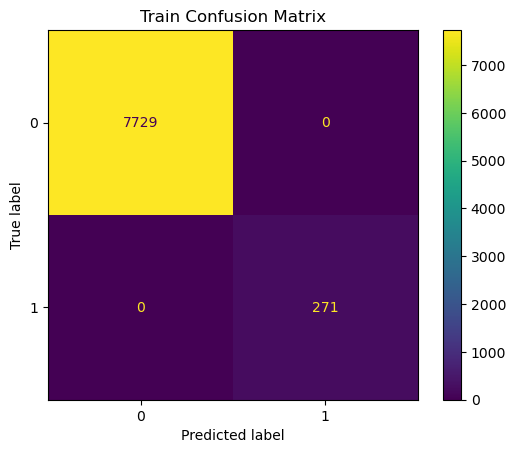

In [97]:
disp_train_cm = ConfusionMatrixDisplay(train_cm, display_labels=estimator.classes_)
disp_train_cm.plot()
plt.title('Train Confusion Matrix')


Text(0.5, 1.0, 'Test Confusion Matrix')

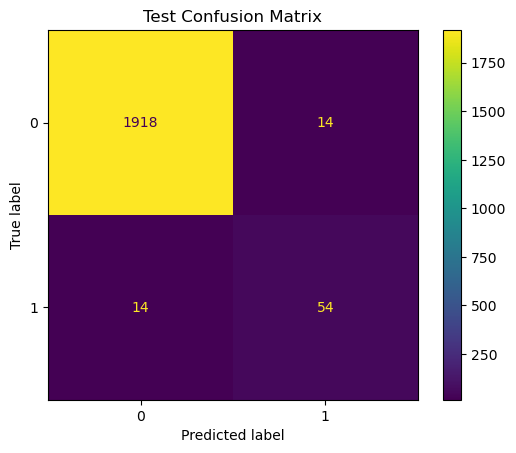

In [98]:
disp_test_cm = ConfusionMatrixDisplay(test_cm, display_labels=estimator.classes_)
disp_test_cm.plot()
plt.title('Test Confusion Matrix')
